<center><h2>Assignment 1<center>

<div align = 'right' ><h5>Name = Shubham Narandekar</h5></div>
<div align = 'right' ><h5>Student Id = 20200132</h5></div>

#### APIs used:
- https://api.covidtracking.com/v1/us/daily.json
- https://api.covidtracking.com/v1/states/daily.json

In [37]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Retrieval and Data storage into json format

I will be reading from two APIs because one of the API focuses on the overall Covid19 data for US and the other API focuses on the state-wise Covid19 data for US. As both the APIs were free and from the same source, there was no limit on the data per call. So, in my case I needed to call both the APIs only once to gather all the data required. The data collected consists of all the Covid19 related data for United States for each day from March 2020 to March 2021. 

##### I am collecting the raw data from the APIs and storing them in two separate json files for further use.
- **Overall-US-daily.json** for overall US data.
- **States-daily.json** for state-wise US data.

In [4]:
#Collecting data for the overall US
usend ='https://api.covidtracking.com/v1/us/daily.json'
req1 = requests.get(usend).json()
with open('jsondata/AllStates/Overall-US-daily.json', 'w') as outfile:
    json.dump(req1, outfile)

#Collecting data for every state in US
statesend ='https://api.covidtracking.com/v1/states/daily.json'
req2 = requests.get(statesend).json()
with open('jsondata/AllStates/States-daily.json', 'w') as outfile:
    json.dump(req2, outfile)

## Loading the data from json files into dataframes
The following code retreives the raw data stored in the json files and collects it in two separate dataframes.

I am using two dataframes for further analysis.
<br>The reason for not integrating both the data frames into one dataframe is that:
<br>**usdata** contains the overall data for all the US states combined. 
<br>On the other hand, **states** containes data that is specific to each state in US for each day from March 2020 to March 2021. Here both the dataframes may have features with similar names but they are not redundant as each of them has different role.
<br>So I am going to use **usdata** to analyse and visualize the overall status of Covid19 in US and then I will further dive into the state-wise status of Covid19 in US by using **states** dataframe.

In [38]:
usdata = pd.read_json('jsondata/AllStates/Overall-US-daily.json')
states = pd.read_json('jsondata/AllStates/States-daily.json')

# Data pre-processing and cleaning

### Overall US Covid19 data preprocessing and cleaning

In [39]:
usdata.isnull().sum()

date                          0
states                        0
positive                      1
negative                     48
pending                      51
hospitalizedCurrently        64
hospitalizedCumulative       51
inIcuCurrently               73
inIcuCumulative              72
onVentilatorCurrently        72
onVentilatorCumulative       79
dateChecked                   0
death                        28
hospitalized                 51
totalTestResults              0
lastModified                  0
recovered                   420
total                         0
posNeg                        0
deathIncrease                 0
hospitalizedIncrease          0
negativeIncrease              0
positiveIncrease              0
totalTestResultsIncrease      0
hash                          0
dtype: int64

As there are multiple features with large number of null values and also some of the features are not needed for further analysis like "dateChecked", "lastModified", "hash".
<br>Some of the features are redundant like "hospitalized" and "hospitalizedCurrently". 
<br>So taking this under consideration I am going to remove redundant features and select only those features which will be more helpful for further analysis of the US Covid19 situation.
<br>Following are the features that I will be using ofr further analysis:

In [40]:
#Removing redundant features and taking only those features that are more helpful for further analysis.
usdata = usdata[['date','states','totalTestResults','totalTestResultsIncrease','positive','positiveIncrease','negative',
               'negativeIncrease','hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','onVentilatorCurrently',
                'onVentilatorCumulative','death','deathIncrease']]
usdata.head(5)

,date,states,totalTestResults,totalTestResultsIncrease,positive,positiveIncrease,negative,negativeIncrease,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,onVentilatorCumulative,death,deathIncrease
0,20210307,56,363824818,1169754,28756184.0,41530,74582825.0,131835,40212.0,878613.0,8137.0,2801.0,4281.0,515148.0,839
1,20210306,56,362655064,1430992,28714654.0,60015,74450990.0,143835,41401.0,877887.0,8409.0,2811.0,4280.0,514309.0,1680
2,20210305,56,361224072,1744417,28654639.0,68787,74307155.0,271917,42541.0,877384.0,8634.0,2889.0,4275.0,512629.0,2221
3,20210304,56,359479655,1590984,28585852.0,65487,74035238.0,177957,44172.0,874603.0,8970.0,2973.0,4267.0,510408.0,1743
4,20210303,56,357888671,1406795,28520365.0,66836,73857281.0,267001,45462.0,873073.0,9359.0,3094.0,4260.0,508665.0,2449


In [41]:
#Converting the datatype of date to datetime format
usdata['date'] = pd.to_datetime(usdata['date'], format='%Y%m%d')
#Sorting the rows according the recent records first
usdata = usdata.sort_values(by='date', ascending=False)

#Cleaning and removing the data before March 2020. Reducing the data to be of one year only from March 20 to March 21.
usdata = usdata[usdata.date >= '2020-03-03']

In [42]:
usdata.isnull().sum()

date                         0
states                       0
totalTestResults             0
totalTestResultsIncrease     0
positive                     0
positiveIncrease             0
negative                     0
negativeIncrease             0
hospitalizedCurrently       14
hospitalizedCumulative       1
inIcuCurrently              23
onVentilatorCurrently       22
onVentilatorCumulative      29
death                        0
deathIncrease                0
dtype: int64

In [43]:
usdata.tail(5)

,date,states,totalTestResults,totalTestResultsIncrease,positive,positiveIncrease,negative,negativeIncrease,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,onVentilatorCumulative,death,deathIncrease
365,2020-03-07,51,12646,931,574.0,137,1148.0,274,NaN,6.0,NaN,NaN,NaN,27.0,1
366,2020-03-06,40,11715,2177,437.0,132,874.0,161,NaN,6.0,NaN,NaN,NaN,26.0,6
367,2020-03-05,32,9538,1515,305.0,65,713.0,132,NaN,5.0,NaN,NaN,NaN,20.0,4
368,2020-03-04,26,8023,890,240.0,126,581.0,576,NaN,4.0,NaN,NaN,NaN,16.0,2
369,2020-03-03,16,7133,279,114.0,42,5.0,2,NaN,NaN,NaN,NaN,NaN,14.0,3


Most of the time the data for some days is not recorded and maybe null for that reason so first I will replace the null values for any day with the values of previous day i,e. one day before it by using **fillna(method='bfill', inplace= True)**,
where the **method=bfill** is used to replace the null values with the values of the next row.
<br>If there are still null values then those null values are from the initial days (of March 2020) of Covid19 as you can see in the above table when people were not yet hospitalized due to Covid19. So these null values are then replaced by 0.

In [44]:
#Replacing the null values with the values of the previous day
usdata['hospitalizedCurrently'].fillna(method='bfill', inplace= True)
usdata['hospitalizedCumulative'].fillna(method='bfill', inplace= True)
usdata['inIcuCurrently'].fillna(method='bfill', inplace= True)
usdata['onVentilatorCurrently'].fillna(method='bfill', inplace= True)
usdata['onVentilatorCumulative'].fillna(method='bfill', inplace= True)
#As in the initial month the count of people hospitalized were not recorded so replacing the initial null values with zero
usdata['hospitalizedCurrently'].fillna(0, inplace= True)
usdata['hospitalizedCumulative'].fillna(0, inplace= True)
usdata['inIcuCurrently'].fillna(0, inplace= True)
usdata['onVentilatorCurrently'].fillna(0, inplace= True)
usdata['onVentilatorCumulative'].fillna(0, inplace= True)
usdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      370 non-null    datetime64[ns]
 1   states                    370 non-null    int64         
 2   totalTestResults          370 non-null    int64         
 3   totalTestResultsIncrease  370 non-null    int64         
 4   positive                  370 non-null    float64       
 5   positiveIncrease          370 non-null    int64         
 6   negative                  370 non-null    float64       
 7   negativeIncrease          370 non-null    int64         
 8   hospitalizedCurrently     370 non-null    float64       
 9   hospitalizedCumulative    370 non-null    float64       
 10  inIcuCurrently            370 non-null    float64       
 11  onVentilatorCurrently     370 non-null    float64       
 12  onVentilatorCumulative

In [45]:
#Changing the data types of all features to int as some of the features were float.
#Here the data type of states is int because it holds the number of states for that day.
usdata = usdata.astype({'positive':'int64', 'negative':'int64', 'hospitalizedCurrently':'int64',
                        'hospitalizedCumulative':'int64', 'inIcuCurrently':'int64', 'onVentilatorCurrently':'int64',
                       'onVentilatorCumulative':'int64', 'death':'int64'})
usdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      370 non-null    datetime64[ns]
 1   states                    370 non-null    int64         
 2   totalTestResults          370 non-null    int64         
 3   totalTestResultsIncrease  370 non-null    int64         
 4   positive                  370 non-null    int64         
 5   positiveIncrease          370 non-null    int64         
 6   negative                  370 non-null    int64         
 7   negativeIncrease          370 non-null    int64         
 8   hospitalizedCurrently     370 non-null    int64         
 9   hospitalizedCumulative    370 non-null    int64         
 10  inIcuCurrently            370 non-null    int64         
 11  onVentilatorCurrently     370 non-null    int64         
 12  onVentilatorCumulative

In [46]:
#Storing the finalized data in a csv file for referring and getting more insights from the data.
usdata.to_csv('usfinal.csv')

### State wise US Covid19 data preprocessing and cleaning

In [47]:
states.isnull().sum()

date                               0
state                              0
positive                         196
probableCases                  11562
negative                        7506
pending                        18641
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3442
hospitalizedCumulative          7889
inIcuCurrently                  9246
inIcuCumulative                16988
onVentilatorCurrently          11658
onVentilatorCumulative         19487
recovered                       8778
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            871
hospitalized                    7889
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6311
positiveTestsViral             11789
negativeTestsViral             15723
positiveCasesViral              6766
deathConfirmed                 11316
d

As there are a lot of features with more number of null values (more than 50%) and most of the features are redundant, I am going to take only useful features from which I can derive information about the current status of covid in each and every state of US. Considering that, following are the features that I am going to select for further states-wise analysis of Covid19 because I just want to focus on positive cases and deaths in each state.

In [48]:
#Taking only those features which will be more helpful for further analysis and removing redundant features
states = states[['date','state','totalTestResults','totalTestResultsIncrease','positive','positiveIncrease','death',
              'deathIncrease']]

In [49]:
#Converting the datatype of date to datetime format
states['date'] = pd.to_datetime(states['date'], format='%Y%m%d')

#Sorting the rows according the recent records first
states = states.sort_values(by='date', ascending=False)

#Cleaning and removing the data before March 2020. Reducing the data to be of one year only from March 20 to March 21
states = states[states.date >= '2020-03-03']

#Checking for null values
states.isnull().sum()

date                          0
state                         0
totalTestResults            123
totalTestResultsIncrease      0
positive                     69
positiveIncrease              0
death                       684
deathIncrease                 0
dtype: int64

In [50]:
states.tail(10)

,date,state,totalTestResults,totalTestResultsIncrease,positive,positiveIncrease,death,deathIncrease
20559,2020-03-03,TX,6.0,0,NaN,0,NaN,0
20558,2020-03-03,RI,5.0,1,2.0,0,NaN,0
20556,2020-03-03,NY,1.0,1,1.0,1,NaN,0
20555,2020-03-03,NJ,0.0,0,NaN,0,0.0,0
20553,2020-03-03,MI,NaN,0,50.0,23,NaN,0
20552,2020-03-03,MA,44.0,15,NaN,0,NaN,0
20551,2020-03-03,IN,8.0,2,NaN,0,NaN,0
20550,2020-03-03,FL,19.0,4,2.0,2,NaN,0
20549,2020-03-03,CT,12.0,4,NaN,0,NaN,0
20554,2020-03-03,NE,48.0,12,NaN,0,NaN,0


From the above table we can see that during the initial days of Covid19 most of the states din't record values for most of the features because there were no deaths yet, or maybe there were no positive cases in those particualr states.
<br>So considering this I am replacing all the null values with 0.

In [51]:
#Replacing the null values by zero because values for particular states for that particular day was not recorded at that time.
states['totalTestResults'].fillna(0, inplace= True)
states['positive'].fillna(0, inplace= True)
states['death'].fillna(0, inplace= True)
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20565 entries, 0 to 20554
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      20565 non-null  datetime64[ns]
 1   state                     20565 non-null  object        
 2   totalTestResults          20565 non-null  float64       
 3   totalTestResultsIncrease  20565 non-null  int64         
 4   positive                  20565 non-null  float64       
 5   positiveIncrease          20565 non-null  int64         
 6   death                     20565 non-null  float64       
 7   deathIncrease             20565 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.4+ MB


In [52]:
#Converting the data types of features to int because some of the features were float.
states = states.astype({'totalTestResults':'int64', 'positive':'int64', 'death':'int64'})
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20565 entries, 0 to 20554
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      20565 non-null  datetime64[ns]
 1   state                     20565 non-null  object        
 2   totalTestResults          20565 non-null  int64         
 3   totalTestResultsIncrease  20565 non-null  int64         
 4   positive                  20565 non-null  int64         
 5   positiveIncrease          20565 non-null  int64         
 6   death                     20565 non-null  int64         
 7   deathIncrease             20565 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.4+ MB


In [53]:
#Storing the finalized data in a csv file for referring and getting more insights from the data.
states.to_csv('statesfinal.csv')

# Data Visualization and Analysis

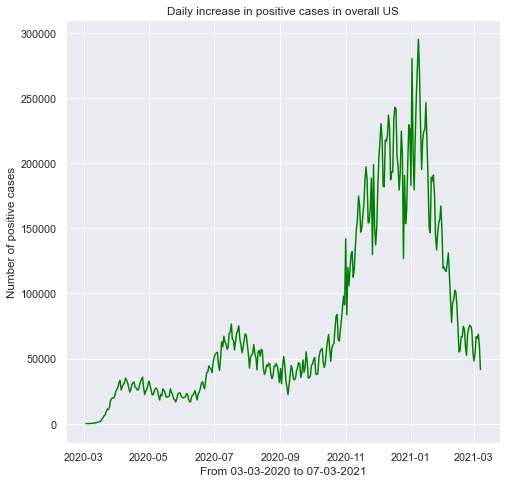

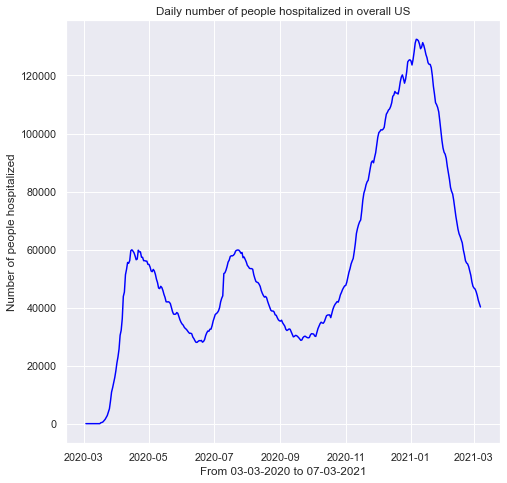

total number of people ever hospitalized till date (07-03-2021)=  878613


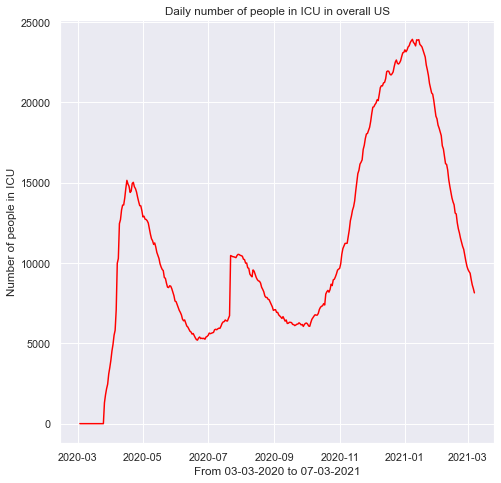

In [22]:
#Daily increase in the positive cases in overall US
sns.set()
plt.figure(figsize=(8, 8), dpi=70)
plt.plot(usdata['date'], usdata['positiveIncrease'], color='green')
plt.title('Daily increase in positive cases in overall US')
plt.ylabel('Number of positive cases')
plt.xlabel('From 03-03-2020 to 07-03-2021')
plt.show()
plt.close()

#Daily number of people who were hospitalized due to Covid19
plt.figure(figsize=(8, 8), dpi=70)
plt.plot(usdata['date'], usdata['hospitalizedCurrently'], color='blue')
plt.title('Daily number of people hospitalized in overall US')
plt.ylabel('Number of people hospitalized')
plt.xlabel('From 03-03-2020 to 07-03-2021')
plt.show()
plt.close()
#Total number of people ever hospitalized till date due to Covid19
print('total number of people ever hospitalized till date (07-03-2021)= ',usdata['hospitalizedCumulative'].max())

#Daily number of people who were in ICU due to Covid19
plt.figure(figsize=(8, 8), dpi=70)
plt.plot(usdata['date'], usdata['inIcuCurrently'], color='red')
plt.title('Daily number of people in ICU in overall US')
plt.ylabel('Number of people in ICU')
plt.xlabel('From 03-03-2020 to 07-03-2021')
plt.show()
plt.close()

From the above three figures we can see that during the period from **May 2020** to **October 2020** the positive cases were in control because of the lockdown restrictions but as soon as the ease of lockdown restrictions, the positive cases increased exponentially after **November 2020**.

<br>The number of people hospitalized initially due to Covid started increasing during **March 2020**, among the large number of people who were hospitalized, most of the people were kept in ICU. Things got under control during **May 2020** to **October 2020** due to lockdown. Th reason for exponential increase in the number of people in ICU was the ease of lockdown restrictions.

<br>So far there are total **878613** people who have ever been hospitalized due to Covid19 in the overall US.

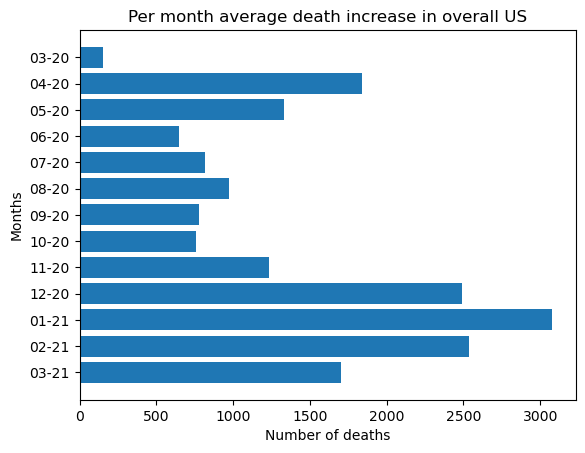

In [56]:
#Grouping all the data by date and then storing average of each month in another data frame.
monthly = usdata.groupby([pd.Grouper(key='date',freq='M')]) 
usavg_month = monthly.mean()

#Daily increase in positive cases for all the states of US combined.
plt.rcdefaults()
fig, ax = plt.subplots()
dates = ['03-20','04-20','05-20','06-20','07-20','08-20','09-20','10-20','11-20','12-20','01-21','02-21','03-21']
ax.barh(dates, usavg_month['deathIncrease'], align='center')
ax.set_yticklabels(dates)
ax.invert_yaxis() 
ax.set_xlabel('Number of deaths')
ax.set_ylabel('Months')
ax.set_title('Per month average death increase in overall US')
plt.show()
plt.close()

The above figure gives us the average number of increases in deaths due to Covid for each month.
<br> **April 2020, December 2020, January 2021** and **February 2021** were very crucial for the entire US because a lot of deaths were reported during these months i.e, above **1500** deaths.

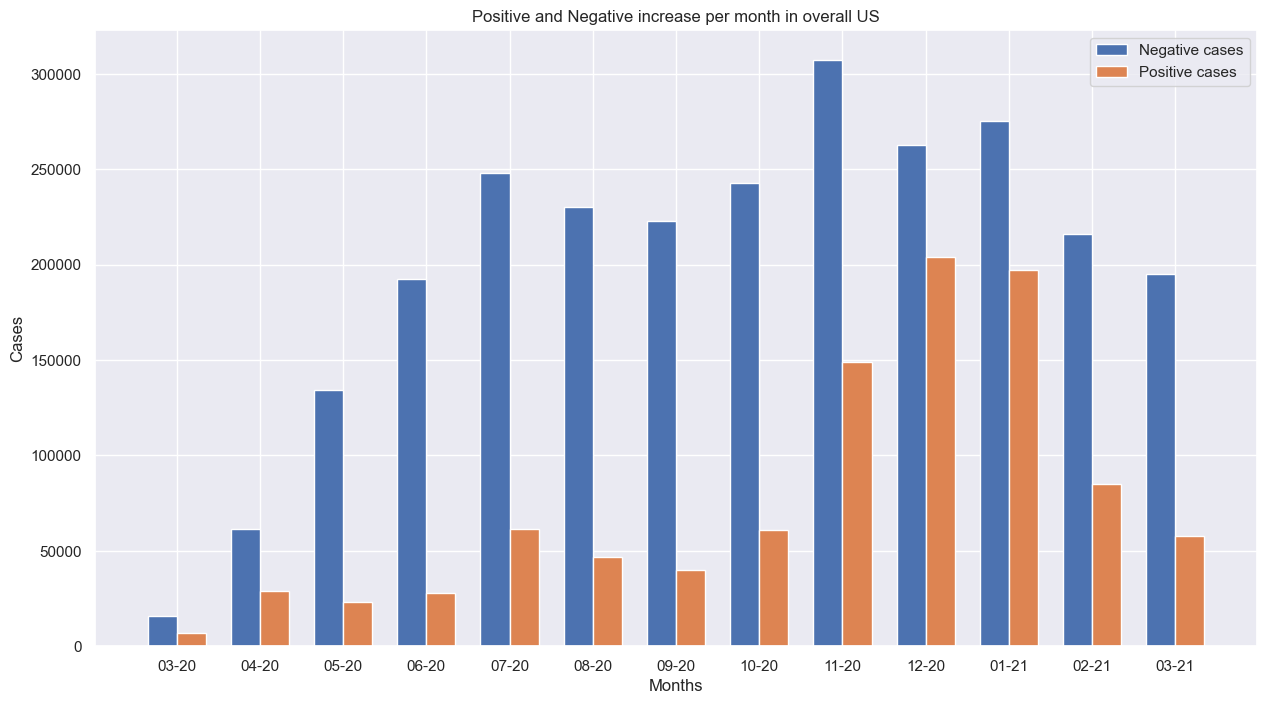

In [55]:
#Representing positive and negative cases per month in overall US
x = np.arange(len(usavg_month.index))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, usavg_month['negativeIncrease'], width, label='Negative cases')
rects2 = ax.bar(x + width/2, usavg_month['positiveIncrease'], width, label='Positive cases')
dates = ['03-20','04-20','05-20','06-20','07-20','08-20','09-20','10-20','11-20','12-20','01-21','02-21','03-21']
ax.set_ylabel('Cases')
ax.set_xlabel('Months')
ax.set_title('Positive and Negative increase per month in overall US')
ax.set_xticks(x)
ax.set_xticklabels(dates)
ax.legend()
plt.show()
plt.close()

The above figure gives us average number of positive and negative increases in cases for each month.
<br>Looking at the figure we can see that most of the people who were tested turned out to be negative than positive during the month of **June 2020, July 2020, August 2020, September 2020** and **October 2020**.
<br>This shows that the poeple were actually following the lockdown and taking precautions.
<br>We can also see that during **December 2020** and **January 2021** almost more than half of the poeple who were tested turned out to be Covid positive.

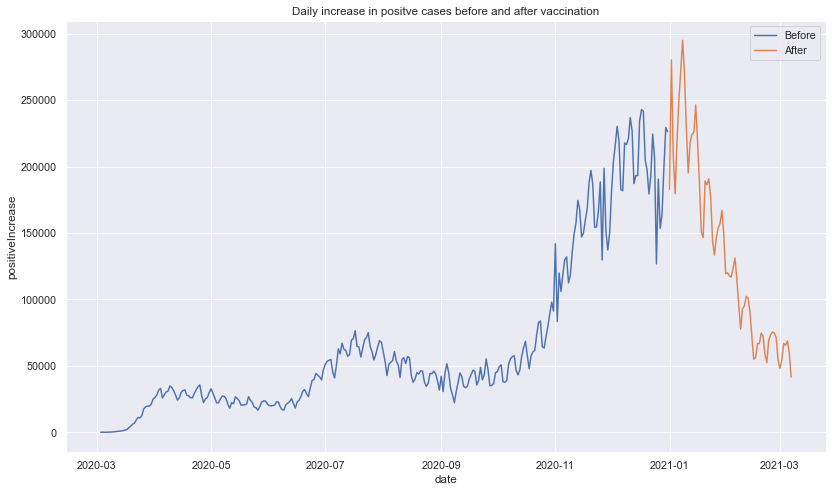

total positive cases before vaccination = 19864374
total positive cases after vaccination = 8891810


In [54]:
After=usdata[usdata.date >= '2021-01-01']
Before=usdata[usdata.date < '2021-01-01']

#Daily increase in positive cases before and after vaccination
sns.set()
plt.figure(figsize=(14, 8), dpi=70)
plt.title('Daily increase in positve cases before and after vaccination')
sns.lineplot(x=Before['date'], y=Before['positiveIncrease'], label='Before')
sns.lineplot(x=After['date'], y=After['positiveIncrease'], label='After')
plt.show()
plt.close()

print('total positive cases before vaccination =', Before['positive'].max())
print('total positive cases after vaccination =', After['positive'].max() - Before['positive'].max())

The above figure simply gives us the trend in which the positive cases were increasing in the entire US.
<br>We can see that number of positive cases were increasing daily until **Jaunuary 2021**. This is where the vaccination of Covid19 were started in US. The total number of psotive cases before vaccination were **19864374**.
<br>Slowly the population of US were vaccinated and the result of it is the decreasing trend in the positive cases after **January 2021**. The total number of positive cases reported after vaccination were **8891150**.

#### *Now that we know the situation of Covid19 in the overall US, let us further dive into states wise situation of Covid19 in US.*

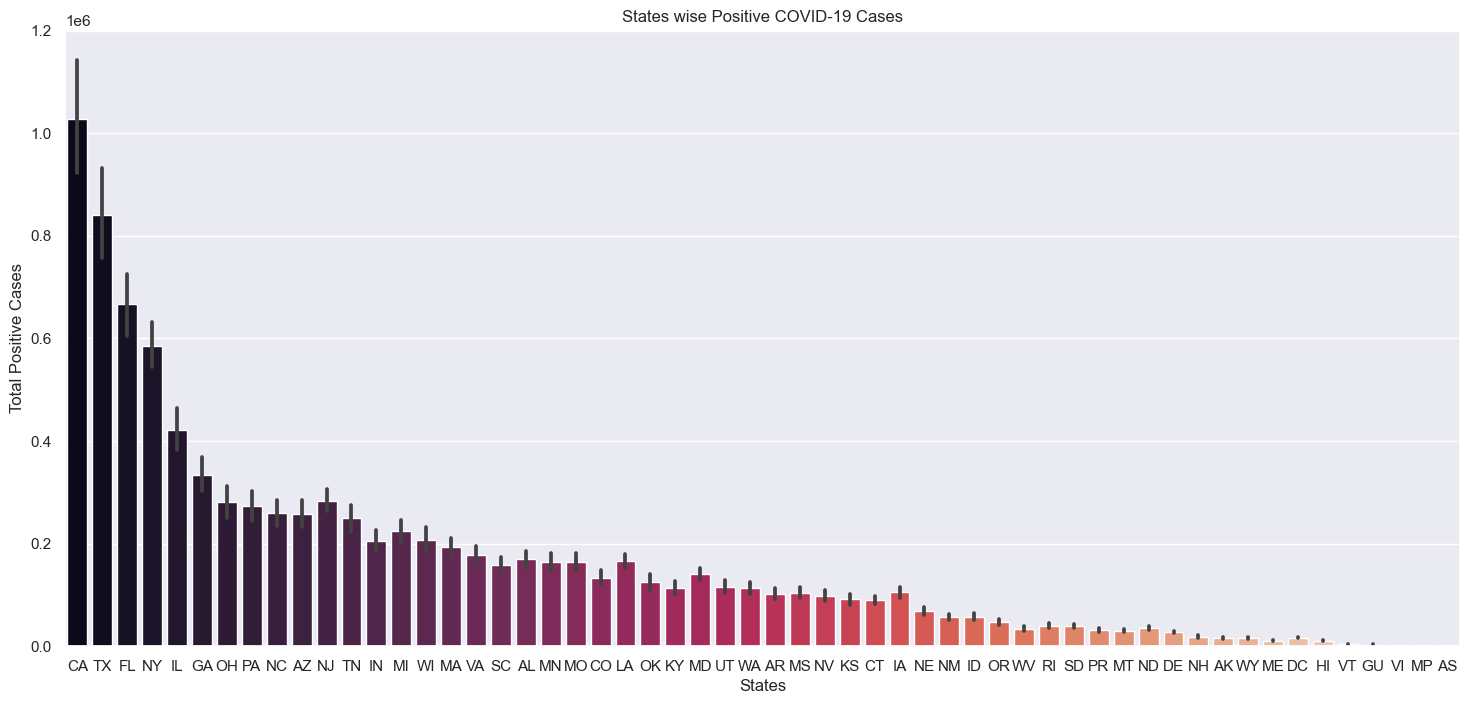

In [26]:
#Positive cases of each and every US state
positive = states.sort_values(by='positive', ascending=False)
plt.figure(figsize=(18, 8), dpi=100)
sns.barplot(x=positive['state'], y=positive['positive'], palette="rocket")
plt.title('States wise Positive COVID-19 Cases')
plt.xlabel('States')
plt.ylabel('Total Positive Cases')
plt.show()
plt.close()

The above figure gives us an idea of positive cases in each state in descending order.
<br>The highest number of positive cases were reported by **California** followed by **Texas** and **Florida**. 
<br>On the other hand almost no positive cases were reported by **American Samoa, Northern Mariana Islands** and **Virgin Islands** which are the territories of US.

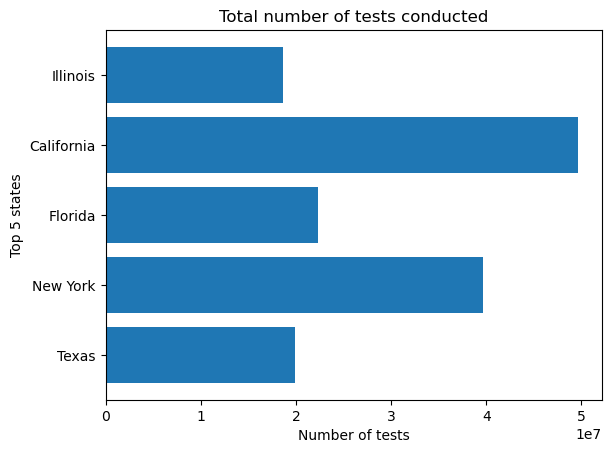

Total test conducted in CA=  49646014 and total positive cases = 3501394
Total test conducted in NY=  39695100 and total positive cases = 1681169
Total test conducted in TX=  19907384 and total positive cases = 2686818


In [27]:
#Top 5 states with positive cases
CA = states[states.state == 'CA'].sort_values(by='date')
NY = states[states.state == 'NY'].sort_values(by='date')
IL = states[states.state == 'IL'].sort_values(by='date')
TX = states[states.state == 'TX'].sort_values(by='date')
FL = states[states.state == 'FL'].sort_values(by='date')

#Total tests conducted for the top 5 states in US.
plt.rcdefaults()
fig, ax = plt.subplots()
labels = ['Illinois', 'California', 'Florida', 'New York', 'Texas']
sizes = [IL['totalTestResults'].max(),CA['totalTestResults'].max(),FL['totalTestResults'].max(),
         NY['totalTestResults'].max(),TX['totalTestResults'].max()]
ax.barh(labels, sizes, align='center')
ax.set_yticklabels(labels)
ax.invert_yaxis() 
ax.set_xlabel('Number of tests')
ax.set_ylabel('Top 5 states')
ax.set_title('Total number of tests conducted')
plt.show()
plt.close()

print('Total test conducted in CA= ', CA['totalTestResults'].max(), 'and total positive cases =', CA['positive'].max())
print('Total test conducted in NY= ', NY['totalTestResults'].max(), 'and total positive cases =', NY['positive'].max())
print('Total test conducted in TX= ', TX['totalTestResults'].max(), 'and total positive cases =', TX['positive'].max())

The above figure gives us the total number of tests conducted by the top 5 (positive cases) states in US.
<br>More than **35000000** tests were conducted in **California** and **New York**.
<br>Similar number of tests were conducted by **Florida, Texas** and **Illinois** which is approximately around **22000000**.

<br>We can see that even if more tests were conducted in **New York** as compared to **Texas**, more number of people were reported as positive in **Texas** than in **New York**.

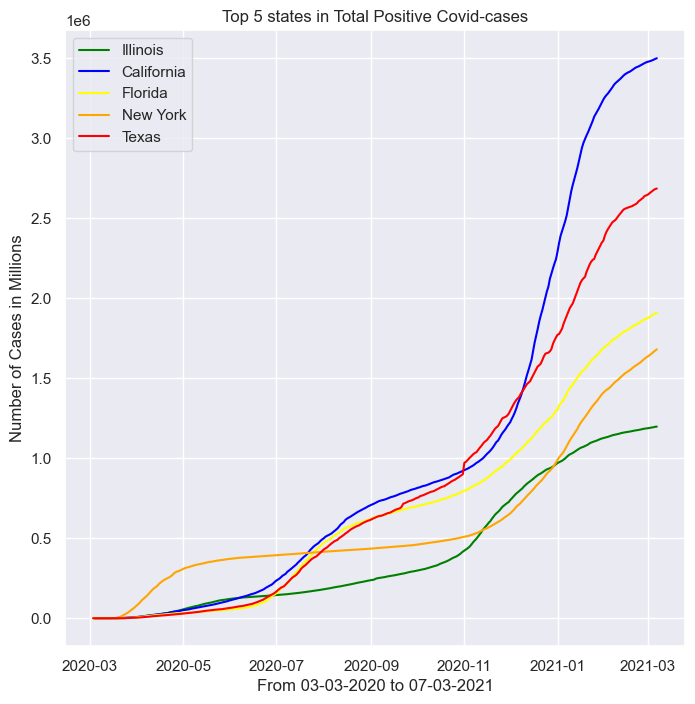

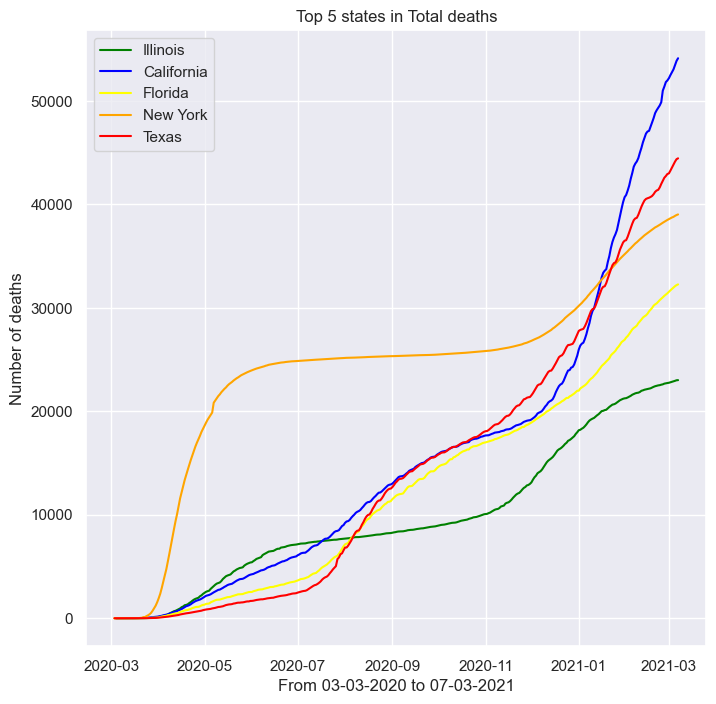

In [29]:
#Plotting the graph for top five states with positive cases
sns.set()
plt.figure(figsize=(8, 8), dpi=100)
plt.plot(IL['date'], IL['positive'], label='Illinois', color='green')
plt.plot(CA['date'], CA['positive'], label='California', color='blue')
plt.plot(FL['date'], FL['positive'], label='Florida', color='yellow')
plt.plot(NY['date'], NY['positive'], label='New York', color='orange')
plt.plot(TX['date'], TX['positive'], label='Texas', color='red')
plt.title('Top 5 states in Total Positive Covid-cases')
plt.ylabel('Number of Cases in Millions')
plt.xlabel('From 03-03-2020 to 07-03-2021')
plt.legend(loc=2)
plt.show()
plt.close()

#Plotting the graph for top five states with deaths
plt.figure(figsize=(8, 8), dpi=100)
plt.plot(IL['date'], IL['death'], label='Illinois', color='green')
plt.plot(CA['date'], CA['death'], label='California', color='blue')
plt.plot(FL['date'], FL['death'], label='Florida', color='yellow')
plt.plot(NY['date'], NY['death'], label='New York', color='orange')
plt.plot(TX['date'], TX['death'], label='Texas', color='red')
plt.title('Top 5 states in Total deaths')
plt.ylabel('Number of deaths')
plt.xlabel('From 03-03-2020 to 07-03-2021')
plt.legend(loc=2)
plt.show()
plt.close()

The above figures depicts the increasing positive cases and relative deaths due to Covid19 for the top five states of US.

<br> We can see that even if there were more positive cases in **Florida** till date than **New York**, number of deaths in **New York** is higher than the deaths in **Florida**. This states that the recoverey rate in **Florida** is much more i.e, the number of people who recovered from Covid19 is higher than that of **New York**.

<br>The figure also states that **New York** was the only state which was facing large number of deaths in the initial months of Covid19 but after **July 2020**, almost every person was recovered and as we can see there was no such increase in the deaths until **December 2020**.

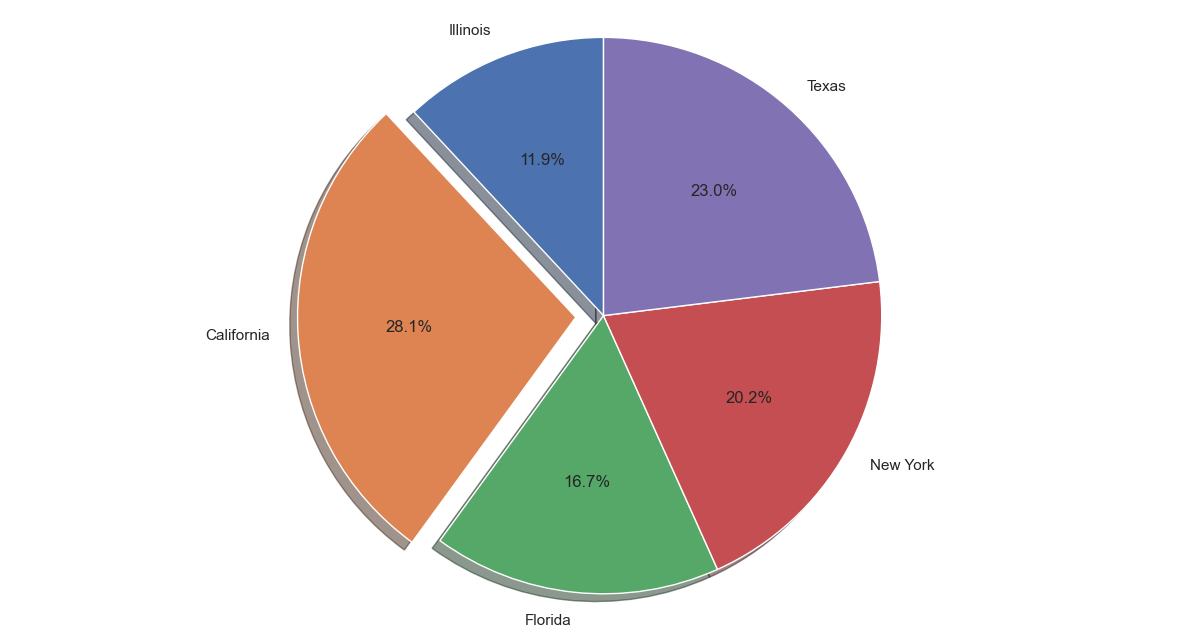

Total deaths =  192884


In [30]:
#Deaths in the top five states due to Covid19
labels = 'Illinois', 'California', 'Florida', 'New York', 'Texas'
sizes = [IL['death'].max(),CA['death'].max(),FL['death'].max(),NY['death'].max(),TX['death'].max()]
fig, ax = plt.subplots(figsize=(15,8))
explode = (0, 0.1, 0, 0, 0)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()
plt.close()

print('Total deaths = ', IL['death'].max()+CA['death'].max()+FL['death'].max()+NY['death'].max()+TX['death'].max())

The above figure shows us the total deaths from the top five states is US.

<br>We can see that out of **192884** deaths, **28.1%** of the deaths were from California i.e, highest number of deaths were reported from that state in the overall US.

<br>Almost similar number of deaths were reported by **Texas** and **New York** which is around **20-24%** of the overall deaths.

<br>On the other hand, **Illinois** managed to recover most of the people who were tested as positive and reported least number of deaths compared to the other four states.

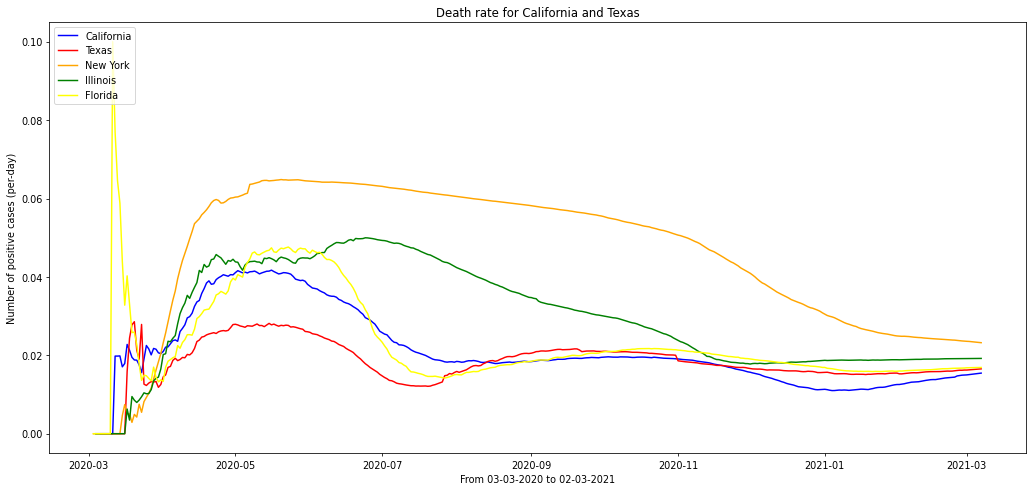

In [57]:
#Death rate of top 5 states for the entire year.
plt.figure(figsize=(18, 8), dpi=70)
plt.plot(CA['date'], CA['death']/CA['positive'], label='California', color='blue')
plt.plot(TX['date'], TX['death']/TX['positive'], label='Texas', color='red')
plt.plot(NY['date'], NY['death']/NY['positive'], label='New York', color='orange')
plt.plot(IL['date'], IL['death']/IL['positive'], label='Illinois', color='green')
plt.plot(FL['date'], FL['death']/FL['positive'], label='Florida', color='yellow')
plt.title('Death rate for California and Texas')
plt.ylabel('Number of positive cases (per-day)')
plt.xlabel('From 03-03-2020 to 02-03-2021')
plt.legend(loc=2)
plt.show()

The above figure gives us an idea about the death rate of the top five states.

<br>We can see that during the phase from **April 2020 to November 2020**, **New York** have suffered from highest death rate. This tells us that this state was not able to recover people who were tessted positive for Covid19 and had a very low recovery rate as compared to the other four states.

<br>In the initial months **Florida** also faced high death rate but then was controlled and people were treated and recovered well.

### Summary:

Overall I can say that US was hit pretty badly by the Covid19 wave. The officials of US some how managed to get things under control for most of its states but were unable to control the situation in big states like **California, Texas, Florida** and **New York**. From the overall analysis I can say that **October, November** and **December** are the months that were very crucial from the entire US because they have faced deaths in large numbers. In the inital months of lockdown poeple did follow the lockdown genuinely but from the increasing positive cases in later months I think people were not taking enough pracuations and following the rules. Talking about the recovery rate as we saw earlier in the figures, **Florida** reported more positives cases than **New York** but then the deaths reported by them were less than **New York**. This tells us that hospitals in **Florida** did a great job by treating people very well. There might be other possible reasons for this like **people in New York who were positive were mostly elder people like in their 50s or 60s** and the reason for recovery in **Florida** maybe the **people who were positive might be mostly youngsters**. 

### Suggestions for future work:

- Currently the API doesnt provide data about the people (age, medical background, etc) who suffered from Cvoid19 but if such data is provided in future then we can use this data to predict or draw insights about which age group suffered more from Covid19 i.e, which age group was able to recover faster, was there any impact on their deaths due to their previous medical background, etc.
- If in future this API provides any data about hospitals in which all these people were admitted then we can use that data to draw insights about which hospitals had a very good recovery rate and also the treatments provided by these hospitals so that the same method of treatment is followed everywhere in future.
- We can also predict whether male or female are more prone to death after suffering from Covid19.
- So overall if this API starts providing more specific data about the treatments and patients then more meaningful and useful insights can be drawn in future to improve the Covid19 situation in US.